Queremos estimar $\mathbb{E}(X)=\alpha \beta=\mu$, proponemos usar el máximo verosímil ($\hat\mu$) y el estimador de momentos ($\bar{X}$). Queremos calcular su eficiencia relativa y saber que estimador conviene usar, debido a que el máximo verosmil se tiene que aproximar númericamente. 

En clase usamos una reparametrizacion de la función de densidad que dependía de $\mu$ $$f(x|\mu,\beta)=\frac{1}{\Gamma(\mu/\beta)\beta^{\mu/\beta}}x^{{\mu/\beta}-1} e^{-x/\beta}$$
La eficiencia asintotica relativa esta dada por $$\text{ARE}(\hat{\mu},\bar{X})=\frac{\beta\mu}{\frac{1}{\mathbb{E}(\frac{d}{d\mu}l(\mu,\beta|X))^2}}=\beta\mu \mathbb{E}(\frac{d}{d\mu}l(\mu,\beta|X))^2$$
Necesitamos calcular la derivada de la log verosimilitud y posteriormente integrarla 

In [2]:
from __future__ import division #Se tiene que importar la division v
import numpy as np #Paqueteria para calculos "cientinficos" 
import math as m #Paqueteria para funciones matematicas 
import matplotlib.pyplot as plt #Paqueteria para graficos basicos
from scipy.misc import derivative #Para derivar
import scipy.integrate as integrate #Para integrar
%matplotlib inline

In [3]:
#Revisar como funciona "lambda" en python
Gamma = lambda x,mu,b: (1/(m.gamma(mu/b)*(b**(mu/b))))*(x**((mu/b)-1))*m.exp(-x/b)
logGamma = lambda x,mu,b: m.log(Gamma(x,mu,b))
#Definimos la densidad de Gamma y el logaritmo de la densidad

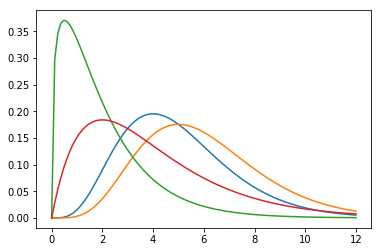

In [4]:
#Unas gráficas de con algunos parametros para mu y beta
X = np.linspace(0,12,100)
x1 = [Gamma(x,5,1) for x in X]
x2 = [Gamma(x,6,1) for x in X]
x3 = [Gamma(x,2,1.5) for x in X]
x4 = [Gamma(x,4,2) for x in X]
p = plt.plot(X,x1)
p = plt.plot(X,x2)
p = plt.plot(X,x3)
p = plt.plot(X,x4)

In [5]:
#Función para derivar parcialmente
def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)

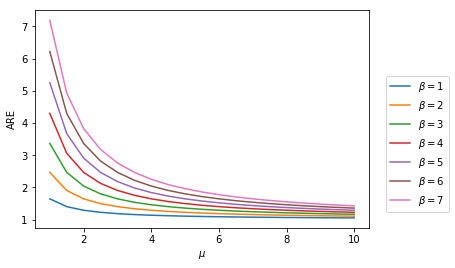

In [7]:
#Integramos la derivada de la logGamma al cuadrado con respecto a la densidad
for b in [1,2,3,4,5,6,7]:
    L = []
    for mu in np.arange(1,10.5,0.5):
        I = integrate.quad(lambda x: partial_derivative(logGamma,1,[x,mu,b])**2*Gamma(x,mu,b),0,300)[0]
        L.append((b*mu*I))
    G = plt.plot(np.arange(1,10.5,0.5),L,label='$\\beta={}$'.format(b))
plt.ylabel('ARE')
plt.xlabel('$\mu$')
leg = plt.legend(bbox_to_anchor=(1.05, 0.7), loc='upper left', borderaxespad=0.)

Sabemos que la varianza del EMV debe ser menor (i.e. ARE>1), por lo tanto la eficiencia debe ser mayor a 1, sin embargo concluimos que cuando $\mu$ es mayor no se tiene tanta perdida usando el estimador obtenido por el metodo de momentos